In [8]:
import os
import gzip as gz
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.preprocessing import MinMaxScaler

In [2]:
with open("/home/adriano/thunderstorm/data/geo/nav-te.lat", 'r') as file:
    LAT = np.fromfile(file, np.float32).reshape((241, 241))

with open("/home/adriano/thunderstorm/data/geo/nav-te.lon", 'r') as file:
    LON = np.fromfile(file, np.float32).reshape((241, 241))

In [9]:
all_data = []
for i, file in enumerate(files):
    print(file)
    with gz.GzipFile(file, 'r') as gz_file:
        mat_in = np.load(gz_file)
        all_data.append(mat_in)
        
all_data = np.array(all_data)

FLASHES-DENSITY-MAPS-IOP1.npy.gz
FLASHES-DENSITY-MAPS-IOP3.npy.gz
FLASHES-DENSITY-MAPS-IOP2.npy.gz
FLASHES-DENSITY-MAPS-IOP4.npy.gz


(4, 241, 241)

In [17]:
flat = all_data.ravel().reshape((-1, 1))
norm = MinMaxScaler(feature_range=(0, 1))
normdata = norm.fit_transform(flat).reshape((*all_data.shape))


(241, 241)
(241, 241)
(241, 241)
(241, 241)


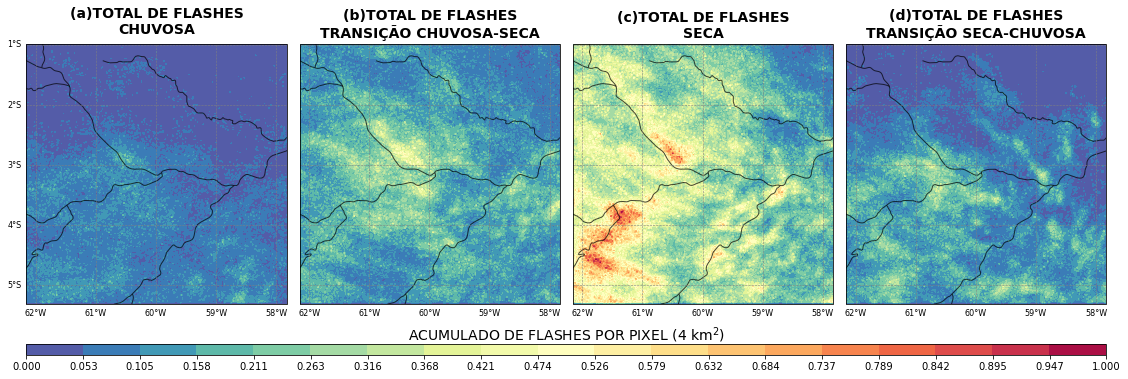

In [19]:
vmin, vmax = 0, 1
cmap = 'Spectral_r'
proj = ccrs.PlateCarree()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
# levels = (1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 95)
levels = np.linspace(0, 1, 20)

files = [
    "FLASHES-DENSITY-MAPS-IOP1.npy.gz",
    "FLASHES-DENSITY-MAPS-IOP3.npy.gz",
    "FLASHES-DENSITY-MAPS-IOP2.npy.gz",
    "FLASHES-DENSITY-MAPS-IOP4.npy.gz"
]

fig = plt.figure(figsize=(15, 5))

PERIODS = [
    "(a)TOTAL DE FLASHES\nCHUVOSA",
    "(b)TOTAL DE FLASHES\nTRANSIÇÃO CHUVOSA-SECA",
    "(c)TOTAL DE FLASHES\nSECA",
    "(d)TOTAL DE FLASHES\nTRANSIÇÃO SECA-CHUVOSA",
]

for i, mat_in in enumerate(normdata):
    print(mat_in.shape)
    ax = plt.subplot(1, 4, i + 1, projection=proj)
    ax.set_title(
        '%s' % (PERIODS[i]),
        fontdict=dict(size=14, weight='bold')
    )
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.RIVERS, lw=1, ec='k', alpha=.7)

    gl = ax.gridlines(crs=proj, draw_labels=True, linewidth=0.6,
                      color='gray', alpha=0.9, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    # gl.bottom_labels = True
    gl.xlabel_style = {'size': 8, 'color': 'black'}
    gl.ylabel_style = {'size': 8, 'color': 'black'}

    if i > 0:
        gl.left_labels = False

    ax.coastlines(linewidth=0.5)

    ctf = ax.contourf(LON, LAT, mat_in, cmap=cmap, levels=levels, norm=norm)
plt.subplots_adjust(left=0, bottom=None, right=1, top=None,
                    hspace=0.15, wspace=0.05)
# cbaxes = fig.add_axes([0.284, 0.08, 0.456, 0.025])
cbaxes = fig.add_axes([0, 0, 1, 0.03])
cbar = fig.colorbar(ctf, cax=cbaxes, ticks=levels, orientation="horizontal")
cbar.set_label(
    r"ACUMULADO DE FLASHES POR PIXEL (4 km$^{2}$)", 
    labelpad=-47, fontdict=dict(size=14)
)

plt.savefig(
    '/home/adriano/thunderstorm/results/density-flashes-maps.png',
    transparent=False, bbox_inches='tight', pad_inches=0.1
)

FLASHES-DENSITY-MAPS-IOP1.npy.gz
27.0
FLASHES-DENSITY-MAPS-IOP3.npy.gz
52.0
FLASHES-DENSITY-MAPS-IOP2.npy.gz
95.0
FLASHES-DENSITY-MAPS-IOP4.npy.gz
41.0


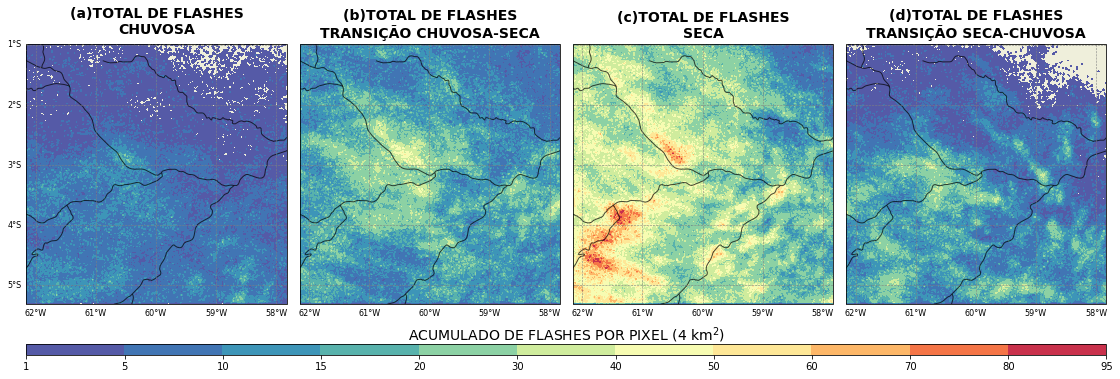

In [20]:
vmin, vmax = 1, 95
cmap = 'Spectral_r'
proj = ccrs.PlateCarree()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
levels = (1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 95)

files = [
    "FLASHES-DENSITY-MAPS-IOP1.npy.gz",
    "FLASHES-DENSITY-MAPS-IOP3.npy.gz",
    "FLASHES-DENSITY-MAPS-IOP2.npy.gz",
    "FLASHES-DENSITY-MAPS-IOP4.npy.gz"
]

fig = plt.figure(figsize=(15, 5))

PERIODS = [
    "(a)TOTAL DE FLASHES\nCHUVOSA",
    "(b)TOTAL DE FLASHES\nTRANSIÇÃO CHUVOSA-SECA",
    "(c)TOTAL DE FLASHES\nSECA",
    "(d)TOTAL DE FLASHES\nTRANSIÇÃO SECA-CHUVOSA",
]
for i, file in enumerate(files):
    print(file)
    with gz.GzipFile(file, 'r') as gz_file:
        mat_in = np.load(gz_file)
        print(np.nanmax(mat_in))

    ax = plt.subplot(1, 4, i + 1, projection=proj)
    ax.set_title(
        '%s' % (PERIODS[i]),
        fontdict=dict(size=14, weight='bold')
    )
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.RIVERS, lw=1, ec='k', alpha=.7)

    gl = ax.gridlines(crs=proj, draw_labels=True, linewidth=0.6,
                      color='gray', alpha=0.9, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    # gl.bottom_labels = True
    gl.xlabel_style = {'size': 8, 'color': 'black'}
    gl.ylabel_style = {'size': 8, 'color': 'black'}

    if i > 0:
        gl.left_labels = False

    ax.coastlines(linewidth=0.5)

    ctf = ax.contourf(LON, LAT, mat_in, cmap=cmap, levels=levels, norm=norm)
plt.subplots_adjust(left=0, bottom=None, right=1, top=None,
                    hspace=0.15, wspace=0.05)
# cbaxes = fig.add_axes([0.284, 0.08, 0.456, 0.025])
cbaxes = fig.add_axes([0, 0, 1, 0.03])
cbar = fig.colorbar(ctf, cax=cbaxes, ticks=levels, orientation="horizontal")
cbar.set_label(
    r"ACUMULADO DE FLASHES POR PIXEL (4 km$^{2}$)", 
    labelpad=-47, fontdict=dict(size=14)
)

plt.savefig(
    '/home/adriano/thunderstorm/results/density-flashes-maps.pdf',
    transparent=False, bbox_inches='tight', pad_inches=0.1
)

strokes-density.iop1.npy.gz
29.0
strokes-density.iop2.npy.gz
87.0
strokes-density.iop3.npy.gz
78.0
strokes-density.iop4.npy.gz
64.0


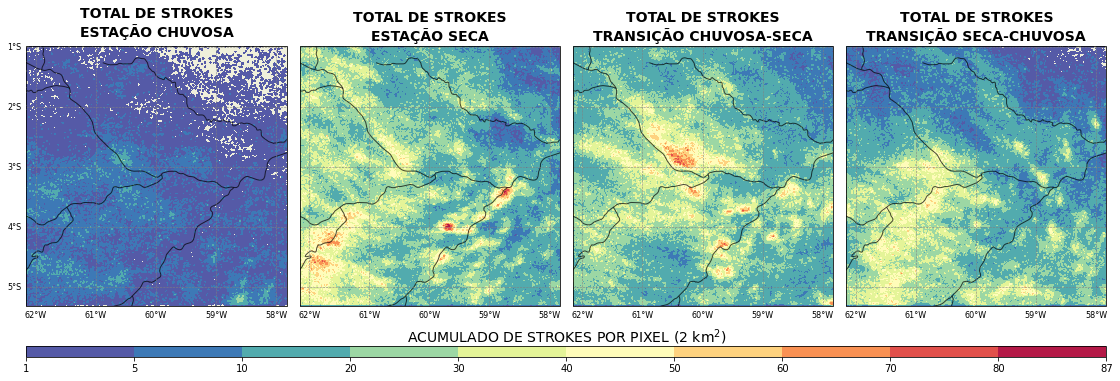

In [4]:
vmin, vmax = 1, 87
cmap = 'Spectral_r'
proj = ccrs.PlateCarree()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
levels = (1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 87)

files = [
    "strokes-density.iop1.npy.gz",
    "strokes-density.iop2.npy.gz",
    "strokes-density.iop3.npy.gz",
    "strokes-density.iop4.npy.gz"
]

fig = plt.figure(figsize=(15, 5))

PERIODS = [
    "ESTAÇÃO CHUVOSA",
    "ESTAÇÃO SECA",
    "TRANSIÇÃO CHUVOSA-SECA",
    "TRANSIÇÃO SECA-CHUVOSA",
]
for i, file in enumerate(files):
    print(file)
    with gz.GzipFile(file, 'r') as gz_file:
        mat_in = np.load(gz_file)
        print(np.nanmax(mat_in))

    ax = plt.subplot(1, 4, i + 1, projection=proj)
    ax.set_title(
        'TOTAL DE STROKES\n%s' % (PERIODS[i]), 
        fontdict=dict(size=14, weight='bold')
    )
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.RIVERS, lw=1, ec='k', alpha=.7)

    gl = ax.gridlines(crs=proj, draw_labels=True, linewidth=0.6,
                      color='gray', alpha=0.9, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    # gl.bottom_labels = True
    gl.xlabel_style = {'size': 8, 'color': 'black'}
    gl.ylabel_style = {'size': 8, 'color': 'black'}

    if i > 0:
        gl.left_labels = False

    ax.coastlines(linewidth=0.5)

    ctf = ax.contourf(LON, LAT, mat_in, cmap=cmap, levels=levels, norm=norm)
plt.subplots_adjust(left=0, bottom=None, right=1, top=None,
                    hspace=0.15, wspace=0.05)
# cbaxes = fig.add_axes([0.284, 0.08, 0.456, 0.025])
cbaxes = fig.add_axes([0, 0, 1, 0.03])
cbar = fig.colorbar(ctf, cax=cbaxes, ticks=levels, orientation="horizontal")
cbar.set_label(
    r"ACUMULADO DE STROKES POR PIXEL (2 km$^{2}$)", 
    labelpad=-47, fontdict=dict(size=14)
)

plt.savefig(
    '/home/adriano/thunderstorm/results/density-strokes-maps.png',
    transparent=False, bbox_inches='tight', pad_inches=0.1
)

flashes-density.iop1.npy.gz
21.0
flashes-density.iop2.npy.gz
72.0
flashes-density.iop3.npy.gz
72.0
flashes-density.iop4.npy.gz
53.0


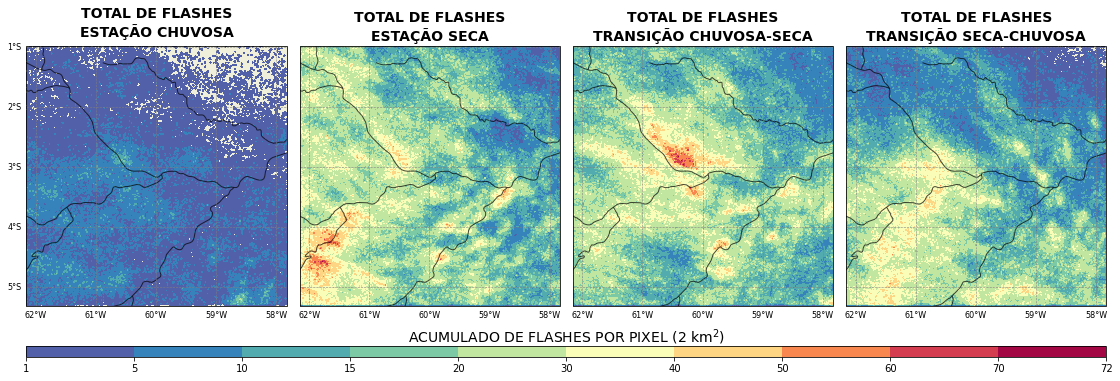

In [5]:
vmin, vmax = 1, 72
cmap = 'Spectral_r'
proj = ccrs.PlateCarree()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
levels = (1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 72)

files = [
    "flashes-density.iop1.npy.gz",
    "flashes-density.iop2.npy.gz",
    "flashes-density.iop3.npy.gz",
    "flashes-density.iop4.npy.gz"
]

fig = plt.figure(figsize=(15, 5))

PERIODS = [
    "ESTAÇÃO CHUVOSA",
    "ESTAÇÃO SECA",
    "TRANSIÇÃO CHUVOSA-SECA",
    "TRANSIÇÃO SECA-CHUVOSA",
]
for i, file in enumerate(files):
    print(file)
    with gz.GzipFile(file, 'r') as gz_file:
        mat_in = np.load(gz_file)
        print(np.nanmax(mat_in))

    ax = plt.subplot(1, 4, i + 1, projection=proj)
    ax.set_title(
        'TOTAL DE FLASHES\n%s' % (PERIODS[i]),
        fontdict=dict(size=14, weight='bold')
    )
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.RIVERS, lw=1, ec='k', alpha=.7)

    gl = ax.gridlines(crs=proj, draw_labels=True, linewidth=0.6,
                      color='gray', alpha=0.9, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    # gl.bottom_labels = True
    gl.xlabel_style = {'size': 8, 'color': 'black'}
    gl.ylabel_style = {'size': 8, 'color': 'black'}

    if i > 0:
        gl.left_labels = False

    ax.coastlines(linewidth=0.5)

    ctf = ax.contourf(LON, LAT, mat_in, cmap=cmap, levels=levels, norm=norm)
plt.subplots_adjust(left=0, bottom=None, right=1, top=None,
                    hspace=0.15, wspace=0.05)
# cbaxes = fig.add_axes([0.284, 0.08, 0.456, 0.025])
cbaxes = fig.add_axes([0, 0, 1, 0.03])
cbar = fig.colorbar(ctf, cax=cbaxes, ticks=levels, orientation="horizontal")
cbar.set_label(
    r"ACUMULADO DE FLASHES POR PIXEL (2 km$^{2}$)", 
    labelpad=-47, fontdict=dict(size=14)
)

plt.savefig(
    '/home/adriano/thunderstorm/results/density-flashes-maps.pdf',
    transparent=False, bbox_inches='tight', pad_inches=0.1
)